### Dataset : 'Change 2022 Creative Data writeback_091122.xlxs'

Data cleaning process for 'Change 2022 Creative Data writeback_091122.xlsx' dataset. 

Excel cleaning: A new column 'Spend_new' with 'number' format  was created containing the 'Spend' column  data but converted to number format as some of the cells has a date-time value instead. 



- Import the necessary libraries
- Load the dataset into a dataframe using Pandas
- Sense check the dataset
- Check for duplicated and delete the duplicated rows
- Drop unnecessary columns
- Rename columns
- Handle missing, incorrect and invalid data
- Change datatypes

- Perform additional steps - parsing dates, creating additional columns, merging multiple dataset etc

## Import and Explore the data

## Prepare the workstation

In [1]:
# Import the necessary libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the figure size.
sns.set(rc={'figure.figsize':(12, 8)})

# Set the plot style as white.
sns.set_style('white')

#### Load the dataset and sense-check 
  *(Ensure dataset is in current working directory)*

In [3]:
# Load the dataset 
df_creative = pd.read_excel('Change 2022 Creative Data writeback_091122_altered.xlsx')

# View the dataframe
df_creative.head()

,Requested URL Path,Campaign,Ad Format,Clicks,Spend,Creative - Size,Date,Impressions,Reach,Audience,...,Creative - Version,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score,Spend_new
0,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.26,NaN,2022-05-19,119,63.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.26
1,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.15,NaN,2022-05-19,9,8.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.15
2,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.38,NaN,2022-05-19,26,17.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.38
3,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.19,NaN,2022-05-19,12,10.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.19
4,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,1.0,3.62,NaN,2022-05-19,247,150.0,1,...,EarlyBird,NaN,NaN,NaN,165,0,0.004049,NaN,NaN,3.62


In [4]:
# Sense check the data sets to determine shape, data types and column names
print('Shape of dataset:\n',df_creative.shape)
print('\nDatatypes:\n',df_creative.dtypes)
print('\nColumns : \n',df_creative.columns)

Shape of dataset:
 (102068, 22)

Datatypes:
 Requested URL Path                 object
Campaign                           object
Ad Format                          object
Clicks                            float64
Spend                              object
Creative - Size                    object
Date                       datetime64[ns]
Impressions                         int64
Reach                             float64
Audience                           object
Platform                           object
Creative - Family                  object
Creative - Version                 object
100% Video Views                  float64
Video Starts                      float64
Follows                           float64
Days away from max date             int64
Latest report?                      int64
CTR                               float64
CTR Score                         float64
Weighted CTR Score                float64
Spend_new                          object
dtype: object

Columns : 
 Inde

In [5]:
# Determine the metadata of the data set.
# This gives us information about the columns in the dataframe and their datatypes.
df_creative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102068 entries, 0 to 102067
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Requested URL Path       14205 non-null   object        
 1   Campaign                 101996 non-null  object        
 2   Ad Format                101997 non-null  object        
 3   Clicks                   90191 non-null   float64       
 4   Spend                    102068 non-null  object        
 5   Creative - Size          73485 non-null   object        
 6   Date                     102068 non-null  datetime64[ns]
 7   Impressions              102068 non-null  int64         
 8   Reach                    80824 non-null   float64       
 9   Audience                 102027 non-null  object        
 10  Platform                 102068 non-null  object        
 11  Creative - Family        101185 non-null  object        
 12  Creative - Versi

In [6]:
# Make a copy of the dataframe before cleaning
df = df_creative.copy()
df.head()

,Requested URL Path,Campaign,Ad Format,Clicks,Spend,Creative - Size,Date,Impressions,Reach,Audience,...,Creative - Version,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score,Spend_new
0,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.26,NaN,2022-05-19,119,63.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.26
1,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.15,NaN,2022-05-19,9,8.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.15
2,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.38,NaN,2022-05-19,26,17.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.38
3,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.19,NaN,2022-05-19,12,10.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.19
4,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,1.0,3.62,NaN,2022-05-19,247,150.0,1,...,EarlyBird,NaN,NaN,NaN,165,0,0.004049,NaN,NaN,3.62


In [7]:
# Check 'Creative - Size' values
df['Creative - Size'].value_counts()

300x600                                     9075
300x250                                     7806
728x90                                      7377
160x600                                     6190
970x250                                     5977
                                            ... 
wholesale lenders for mortgage brokers         3
top mortgage companies to work for 2020        1
best mortgage loan companies to work for       1
no income mortgage                             1
mortgage wholesale broker                      1
Name: Creative - Size, Length: 99, dtype: int64

<br>The 'Creative- size' column contains a lot of illogical data and is not used in the analysis.
<br>'Requested URL Path', 'Spend', 'Days away from max date', 'Latest report' are not used in the analysis.
##### Columns dropped : 
- Requested URL Path
- Creative  - Size
- Spend (duplicated as 'Spend_new' with correct formatting in Excel)
- Days away from max date
- Latest report?

In [8]:
# Drop unnecessary columns : 'Requested URL Path', 'Spend', 'Days away from max date', 'Latest report?'
df.drop(['Requested URL Path', 'Creative - Size', 'Spend', 'Days away from max date', 'Latest report?'], \
        axis = 1, inplace=True)

# View the dataframe
df.head()

,Campaign,Ad Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative - Family,Creative - Version,100% Video Views,Video Starts,Follows,CTR,CTR Score,Weighted CTR Score,Spend_new
0,FY22,Single image,0.0,2022-05-19,119,63.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.26
1,FY22,Single image,0.0,2022-05-19,9,8.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.15
2,FY22,Single image,0.0,2022-05-19,26,17.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.38
3,FY22,Single image,0.0,2022-05-19,12,10.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.19
4,FY22,Single image,1.0,2022-05-19,247,150.0,1,Facebook,CloserTwins,EarlyBird,NaN,NaN,NaN,0.004049,NaN,NaN,3.62


#### Renaming columns following same naming formats across all datasets used in the analysis

In [9]:
# Rename columns

df.rename({'Ad Format' : 'Ad_Format',
           'Creative - Family': 'Creative_Family',
           'Creative - Version': 'Creative_Version',
           '100% Video Views': '100%_Video_Views',
           'Video Starts': 'Video_Starts',
           'CTR Score': 'CTR_Score', 'Weighted CTR Score':'Weighted_CTR_Score',
           'Spend_new' : 'Spend'}, \
          axis=1, inplace=True)


In [10]:
# Determine the number of missing values
df.isnull().sum()

Campaign                 72
Ad_Format                71
Clicks                11877
Date                      0
Impressions               0
Reach                 21244
Audience                 41
Platform                  0
Creative_Family         883
Creative_Version        525
100%_Video_Views      77621
Video_Starts          76608
Follows               93668
CTR                   12829
CTR_Score             27050
Weighted_CTR_Score    27050
Spend                     0
dtype: int64

In [11]:
# Percentage of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

Follows               91.770192
100%_Video_Views      76.048321
Video_Starts          75.055845
Weighted_CTR_Score    26.501940
CTR_Score             26.501940
Reach                 20.813575
CTR                   12.569072
Clicks                11.636360
Creative_Family        0.865110
Creative_Version       0.514363
Campaign               0.070541
Ad_Format              0.069561
Audience               0.040169
Platform               0.000000
Impressions            0.000000
Date                   0.000000
Spend                  0.000000
dtype: float64

  'Spend' column is in object format. This is converted to float type.
The column contains some values in time format. These are ignored and made to NaN values.
They are then dropped

In [12]:
# 'Spend' column in object format
# Change datatype of 'Spend' to float 
df['Spend'] = pd.to_numeric(df['Spend'], errors='coerce')
print(df['Spend'].dtype)
print(df['Spend'].isnull().sum())

float64
402


In [13]:
# Drop the rows with na in 'Spend'
df.dropna(subset=['Spend'], inplace=True)

In [14]:
# Determine number of clicks for 'Platform' == 'OTT'
len(df['Clicks'].loc[df['Platform']=='OTT'])

11877

In [15]:
df['Clicks'].isna().sum()

11877

 - The 'Clicks' column has blank/Nan values where Platform== OTT
 - The corresponding CTR, CTR_Score, Weighted_CTR_Score are also blank
 - The '100%_Video_Views and 'Video_Starts' columns have values only for Ad_format = 'Video'
 - Replace the integer/float columns having blank/NaN with 0

In [16]:
# Use fillna() to replace NaN with 0 for 'Clicks', 'Reach','100%_Video_Views','Video_Starts', 'Follows', 'CTR',
# 'CTR_Score', 'Weighted_CTR_Score'

cols = ['Clicks','Reach','100%_Video_Views','Video_Starts','Follows', 'CTR', 'CTR_Score', 'Weighted_CTR_Score']
df[cols] = df[cols].fillna(0)

In [17]:
# Change datatypes from float to int for 'Clicks','Reach', '100%_Video_Views', 'Video_Starts', 'Follows' as these are integer values
cols = ['Clicks','Reach','100%_Video_Views','Video_Starts','Follows'] 
df[cols] = df[cols].astype(int)
df.dtypes

Campaign                      object
Ad_Format                     object
Clicks                         int32
Date                  datetime64[ns]
Impressions                    int64
Reach                          int32
Audience                      object
Platform                      object
Creative_Family               object
Creative_Version              object
100%_Video_Views               int32
Video_Starts                   int32
Follows                        int32
CTR                          float64
CTR_Score                    float64
Weighted_CTR_Score           float64
Spend                        float64
dtype: object

In [18]:
# Check sum of missing values in the dataframe
df.isna().sum().sort_values(ascending=False)

Creative_Family       883
Creative_Version      525
Campaign               72
Ad_Format              71
Audience               41
Date                    0
Impressions             0
Reach                   0
Platform                0
Clicks                  0
100%_Video_Views        0
Video_Starts            0
Follows                 0
CTR                     0
CTR_Score               0
Weighted_CTR_Score      0
Spend                   0
dtype: int64

*Columns with na values replace with 'No Answer'*
- Campaign
- Ad_Format 
- Audience
- Creative_Family
- Creative_Version

In [19]:
# Replace columns having na values with 'No Answer'
df['Campaign'].fillna('No Answer', inplace=True)
df['Ad_Format'].fillna('No Answer', inplace=True)
df['Audience'].fillna('No Answer', inplace=True)
df['Creative_Family'].fillna('No Answer', inplace=True)
df['Creative_Version'].fillna('No Answer', inplace=True)

In [20]:
# Determine sum of missing values
df.isna().sum()

Campaign              0
Ad_Format             0
Clicks                0
Date                  0
Impressions           0
Reach                 0
Audience              0
Platform              0
Creative_Family       0
Creative_Version      0
100%_Video_Views      0
Video_Starts          0
Follows               0
CTR                   0
CTR_Score             0
Weighted_CTR_Score    0
Spend                 0
dtype: int64

In [21]:
# Determine the types of 'Creative_Family'
df['Creative_Family'].value_counts()

CloserTwins                      38332
UnfairAdvantage                  38183
CloseFaster                      15449
SEM Ads                           8613
No Answer                          883
CompetitiveOpportunity             114
Carousel Ad1                        20
Ad1 Domain                          20
Ad1 audience 1                      12
Carousel Ad1 - CRM Audience 1       10
Ad1                                  8
Carousel Ad2 - CRM Audience 2        8
Carousel Ad1 - CRM Audience3         7
Ad1 Audience 3 CRM                   7
Name: Creative_Family, dtype: int64

#### Check the data for the allowed list of 'Creative_Family' values 

In [22]:
# Replace all values not in the allowed list of Creative family to 'Other'
allowed_vals = ['CloserTwins','UnfairAdvantage','CloseFaster','SEM Ads','CompetitiveOpportunity']

df.loc[~df['Creative_Family'].isin(allowed_vals), 'Creative_Family'] = "Other"

# Verify the 'Creative_Family' types
df['Creative_Family'].value_counts()

CloserTwins               38332
UnfairAdvantage           38183
CloseFaster               15449
SEM Ads                    8613
Other                       975
CompetitiveOpportunity      114
Name: Creative_Family, dtype: int64

In [23]:
# campaign_dict ={'CloserTwins':'CloserTwins', 'UnfairAdvantage':'UnfairAdvantage', 
#                 'CloseFaster':'CloseFaster', 'SEM Ads':'SEM Ads', 
#                 'No Answer':'Other', 
#                 'CompetitiveOpportunity':'CompetitiveOpportunity', 
#                 'Other':'Other', 'Ad1 Domain':'Other', 'Carousel Ad1':'Other', 
#                 'Ad1 audience 1':'Other', 'Carousel Ad1 - CRM Audience 1':'Other',
#                 'Ad1 Audience 3 CRM':'Other', 'Ad1':'Other', 
#                 'Carousel Ad1 - CRM Audience3':'Other', 
#                 'Carousel Ad2 - CRM Audience 2':'Other'}
 
# # Add a new column named 'Campaign_Name'
# df['Campaign_Name'] = df['Creative_Family'].map(campaign_dict)
# df.Campaign_Name.value_counts()

In [24]:
# Determine types of Ad_Formats
df['Ad_Format'].value_counts()

Display                  45183
Native                   15283
CPC                       8613
Single image              7878
Video                     7161
TV                        6806
MOBILE                    2776
Audio                     2488
TABLET                    1912
Display - Interactive     1459
Carousel                  1334
DESKTOP                    383
Follower ads               291
No Answer                   71
No lock campaign            28
Name: Ad_Format, dtype: int64

In [25]:
# Ad_Format = No lock campaign is invalid.
# Ad_Format= 'No lock campaign' checked against Campaign to replace with correct ad format. 
df.loc[df['Campaign'].str.contains(pat='No Lock Campaign - Carousel'), 'Ad_Format'] = 'Carousel'
df.loc[df['Campaign'].str.contains(pat='No Lock Campaign - Single DSC'), 'Ad_Format'] = 'Single image'
df.drop(df[df['Ad_Format'] == 'No lock campaign'].index, inplace=True)

In [26]:
# Types of 'Ad_Formats'
df['Ad_Format'].value_counts()

Display                  45183
Native                   15283
CPC                       8613
Single image              7889
Video                     7161
TV                        6806
MOBILE                    2776
Audio                     2488
TABLET                    1912
Display - Interactive     1459
Carousel                  1349
DESKTOP                    383
Follower ads               291
No Answer                   71
Name: Ad_Format, dtype: int64

In [27]:
# Shape of the dataframe after cleaning
print(df.shape)

# Describe the data
df.describe()

(101664, 17)


,Clicks,Impressions,Reach,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend
count,101664.000000,101664.000000,101664.000000,101664.000000,101664.000000,101664.000000,101664.000000,101664.000000,101664.000000,101664.000000
mean,0.663234,463.438080,144.579645,24.197858,37.498810,0.004731,0.012344,0.471480,244.685385,7.209050
std,3.327004,1565.548992,535.142843,225.875831,339.238525,0.141750,0.083078,0.410827,906.281370,41.098153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101180
50%,0.000000,54.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.500000,14.500000,0.593024
75%,0.000000,285.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.500000,137.500000,3.220327
max,573.000000,59784.000000,16601.000000,14173.000000,19635.000000,11.000000,2.000000,1.500000,82870.500000,3642.180000


In [28]:
df['Audience'].value_counts()

General Targetting    21681
4                     20574
1                     16472
3                     15996
5                     14339
2                     12559
No Answer                41
Domain Targeting          2
Name: Audience, dtype: int64

In [29]:
df.loc[df['Audience'] == 'Domain Targeting']

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend
62337,Domain Targeting - No Lock Campaign - Single D...,Single image,42,2022-09-06,8130,0,Domain Targeting,LinkedIn,Other,No Answer,0,0,0,0.005166,1.5,12195.0,1914.60
62451,Domain Targeting - No Lock Campaign - Carousel...,Carousel,4,2022-09-06,665,0,Domain Targeting,LinkedIn,Other,No Answer,0,0,0,0.006015,1.5,997.5,146.83


Audience = 'Domain Targeting' has only 2 rows. These are ignored as we do not know which target group they belong to.

#### Map the'Audience' data to Target Groups as specified in the business objective

In [30]:
# Create new column Target_Group and assign Audience as per target group
audience_dict ={'1':'1', '2':'1', '3':'1',
               '4':'2', '5':'2',
               'General Targetting':'3'
               }
 
# Add a new column named 'Target_Group'
df['Target_Group'] = df['Audience'].map(audience_dict)

In [31]:
# Count of different target groups across the data
df['Target_Group'].value_counts()

1    45027
2    34913
3    21681
Name: Target_Group, dtype: int64

In [32]:
# Write the cleaned dataset on to a csv file
#df.to_csv('creative_data_cleaned.csv', index=False)

## Exploratory Data Analysis

In [33]:
# Grouping the data based on Creative_Family across the target groups to determine the 'Impressions'
family_tg = df.loc[(df['Creative_Family']!= 'Other') & (df['Creative_Family']!='No Answer')].\
groupby(['Creative_Family', 'Target_Group'])['Impressions'].sum().reset_index().\
sort_values(by='Impressions',ascending=False)
family_tg

,Creative_Family,Target_Group,Impressions
8,UnfairAdvantage,2,14590307
3,CloserTwins,2,9812880
4,CloserTwins,3,7397016
1,CloseFaster,2,4269441
7,UnfairAdvantage,1,4093042
2,CloserTwins,1,2708066
0,CloseFaster,1,1805930
5,CompetitiveOpportunity,3,276361
6,SEM Ads,3,66693


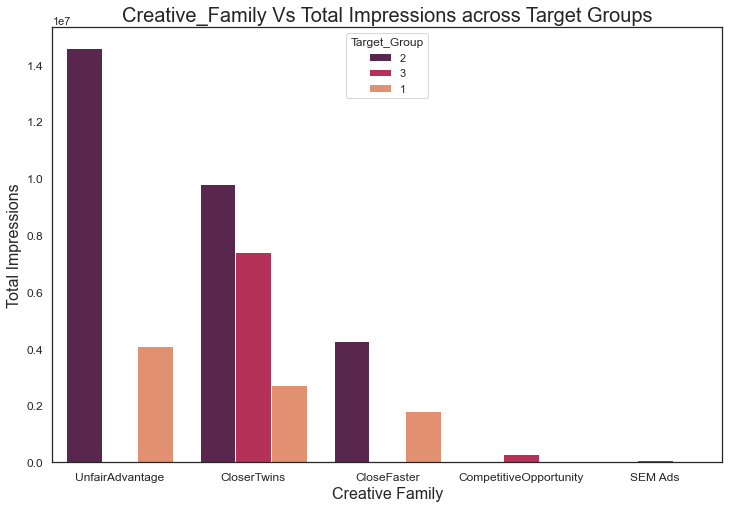

In [34]:
# Plot the family_tg dataframe
sns.barplot(x='Creative_Family',y = 'Impressions', hue = 'Target_Group', data = family_tg, palette = 'rocket')
plt.xlabel('Creative Family',fontsize = 16)
plt.ylabel('Total Impressions', fontsize=16)
plt.title('Creative_Family Vs Total Impressions across Target Groups', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

In [35]:
# Grouping based on 'Platform' and 'Target_Group' to determine sum of 'Impressions'
platform_tg = df.groupby(['Platform', 'Target_Group'])['Impressions'].\
sum().reset_index().sort_values(by='Impressions', ascending=False)
platform_tg

,Platform,Target_Group,Impressions
1,Domain Display,2,19564371
9,OTT,3,7348177
12,User ID Display,2,5998098
11,User ID Display,1,5033150
7,LinkedIn,2,3165406
0,Domain Display,1,2739642
8,LinkedIn,3,1347888
10,Trade Media,3,566118
6,LinkedIn,1,516285
3,Facebook,1,262991


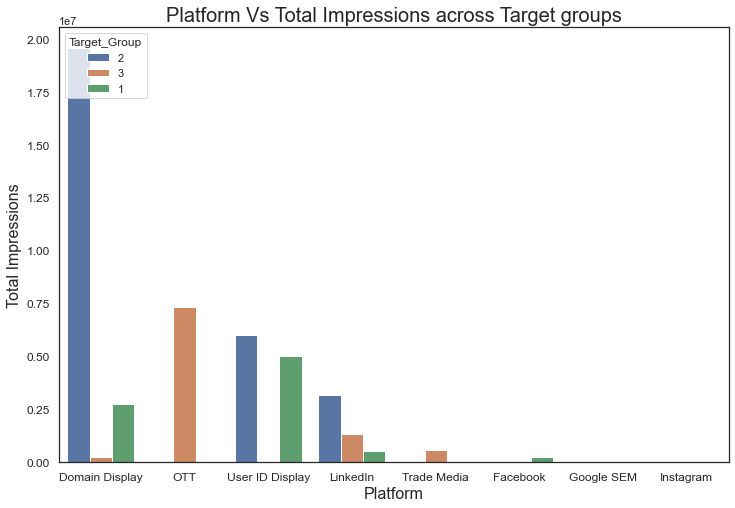

In [36]:
# Plot the platform_tg dataframe
sns.barplot(x='Platform',y = 'Impressions', hue = 'Target_Group', data = platform_tg)
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Total Impressions', fontsize=16)
plt.title('Platform Vs Total Impressions across Target groups', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

<AxesSubplot:xlabel='Date', ylabel='Clicks'>

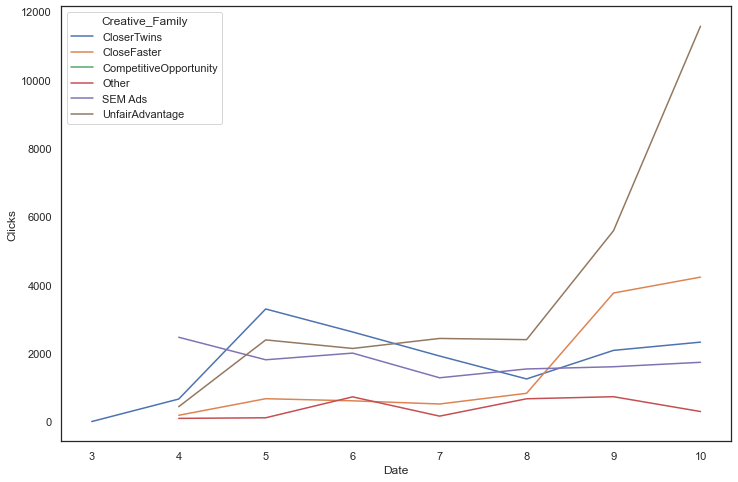

In [37]:
# Determine the number of clicks per creative family monthwise
df_date = df.groupby([df['Date'].dt.month,'Creative_Family'])['Clicks'].sum().reset_index()
df_date

# Plot a line plote
sns.lineplot(x='Date', y = 'Clicks', hue='Creative_Family', data = df_date)

- There is a spike in 'Clicks' for 'unfariAdvantage' in October 2022
- 'CloserTwins' had a spike in May and it went down until August


In [38]:
# Determine mean of numeric values for all Creative Families
df.loc[(df['Creative_Family']!='Other') & (df['Creative_Family']!='No Answer')].groupby('Creative_Family').mean()

,Clicks,Impressions,Reach,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend
Creative_Family,,,,,,,,,,
CloseFaster,0.697845,393.253350,148.157292,0.000000,0.000000,0.0,0.003381,0.656580,283.046573,3.718318
CloserTwins,0.368856,519.617082,206.210138,64.177476,99.454216,0.0,0.001851,0.369287,192.846016,10.247836
CompetitiveOpportunity,3.271930,2424.219298,491.385965,0.000000,0.000000,0.0,0.001939,0.679825,1462.513158,28.605593
SEM Ads,1.443051,7.743295,0.000000,0.000000,0.000000,0.0,0.121078,0.000000,0.000000,1.007123
UnfairAdvantage,0.705497,489.310662,107.790064,0.000000,0.000000,0.0,0.002257,0.610520,312.981196,5.686906


In [39]:
# Total Spend and Spend % on each target group
df_spend = df.groupby('Target_Group')['Spend'].sum().reset_index()
df_spend['Spend%'] = ((df_spend['Spend']/df_spend['Spend'].sum()) * 100).round(2)
df_spend

,Target_Group,Spend,Spend%
0,1,95231.226374,13.58
1,2,323236.933768,46.08
2,3,282974.028915,40.34


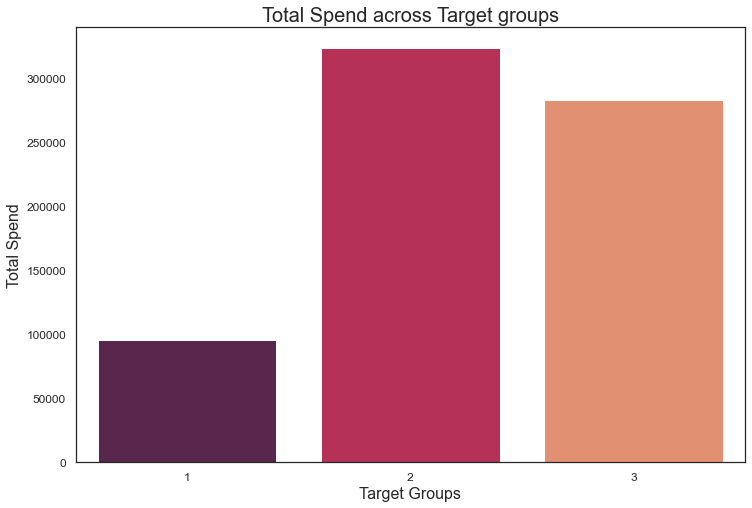

In [40]:
# Plot to show the spend percentage across each target group
sns.barplot(x = 'Target_Group', y = 'Spend', data = df_spend, palette='rocket')
plt.xlabel('Target Groups',fontsize = 16)
plt.ylabel('Total Spend', fontsize=16)
plt.title('Total Spend across Target groups', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

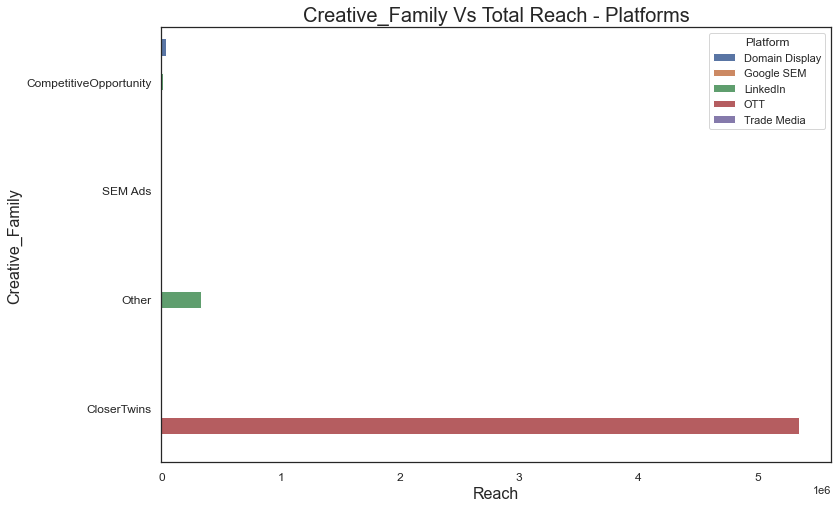

In [41]:
df_family_platform = df.loc[df['Target_Group']=='3'].groupby(['Platform','Creative_Family'])['Reach'].sum().reset_index()
sns.barplot(y='Creative_Family',x = 'Reach', hue = 'Platform', data = df_family_platform)
plt.xlabel('Reach',fontsize = 16)
plt.ylabel('Creative_Family', fontsize=16)
plt.title('Creative_Family Vs Total Reach - Platforms', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

### Target Group dataframe subsets

#### Target Group 1 subset

In [42]:
# Target_Group = 1
tg1 = df.loc[df['Target_Group']=='1']
#cols = ['Creative_Family','Ad_Format','Platform','Spend','Clicks', 'Impressions','Reach', \
       # 'CTR', 'CTR_Score', 'Weighted_CTR_Score','100%_Video_Views','Video_Starts','Follows']
#tg1 = tg1[cols].reindex(cols, axis=1)
tg1.head()

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group
0,FY22,Single image,0,2022-05-19,119,63,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.26,1
1,FY22,Single image,0,2022-05-19,9,8,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.15,1
2,FY22,Single image,0,2022-05-19,26,17,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.38,1
3,FY22,Single image,0,2022-05-19,12,10,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.19,1
4,FY22,Single image,1,2022-05-19,247,150,1,Facebook,CloserTwins,EarlyBird,0,0,0,0.004049,0.0,0.0,3.62,1


#### Target Group 2 subset

In [43]:
# Target_Group = 2
tg2 = df.loc[df['Target_Group']=='2']
tg2.head()

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group
501,4 - StackAdapt - Display - Image,Display,0,2022-04-23,366,93,4,Domain Display,CloseFaster,FasterAll,0,0,0,0.000000,0.5,183.0,1.770169,2
502,4 - StackAdapt - Audio,Audio,0,2022-04-25,366,129,4,Domain Display,CloserTwins,Cutdown1A,0,0,0,0.000000,0.5,183.0,5.021292,2
506,4 - StackAdapt - Display - Interactive ads (al...,Display - Interactive,0,2022-07-15,366,53,4,Domain Display,CloserTwins,CloseMore,0,0,0,0.000000,0.5,183.0,3.203899,2
522,5 - StackAdapt - Remarketing - Banner,Display,5,2022-05-08,4576,232,5,Domain Display,UnfairAdvantage,1099,0,0,0,0.001093,0.5,2288.0,22.458325,2
531,5 - StackAdapt - Remarketing - Banner,Display,0,2022-04-29,33,1,5,Domain Display,UnfairAdvantage,1099,0,0,0,0.000000,0.5,16.5,0.014483,2


#### Target Group 3


In [44]:
# Target_Group = 3
tg3 = df.loc[df['Target_Group']=='3']
tg3.head()

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group
8566,Housing Wire,Display,1,2022-09-04,197,0,General Targetting,Trade Media,Other,No Answer,0,0,0,0.005076,0.0,0.0,0.0,3
8732,Housing Wire,Display,1,2022-09-04,1897,0,General Targetting,Trade Media,Other,No Answer,0,0,0,0.000527,0.0,0.0,0.0,3
9096,Housing Wire,Display,1,2022-09-04,137,0,General Targetting,Trade Media,Other,No Answer,0,0,0,0.007299,0.0,0.0,0.0,3
9132,Housing Wire,Display,0,2022-09-04,19,0,General Targetting,Trade Media,Other,1099,0,0,0,0.000000,0.0,0.0,0.0,3
9268,Housing Wire,Display,0,2022-09-04,145,0,General Targetting,Trade Media,Other,NoDTI,0,0,0,0.000000,0.0,0.0,0.0,3


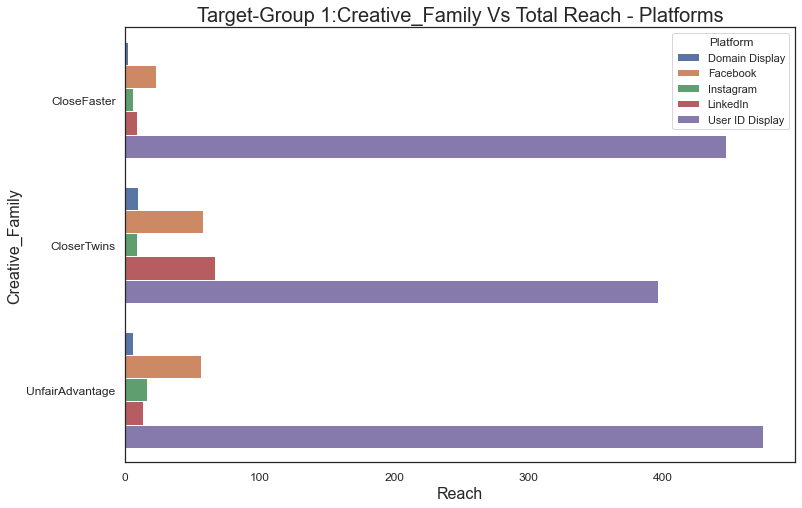

In [45]:
# Group Target_Group=1 on Platform and Creative_Family to determine total 'Reach'
fam_plat1 = tg1.loc[tg1['Creative_Family']!='Other'].groupby(['Platform','Creative_Family'])['Reach'].mean().reset_index()
sns.barplot(y='Creative_Family',x = 'Reach', hue = 'Platform', data = fam_plat1)
plt.xlabel('Reach',fontsize = 16)
plt.ylabel('Creative_Family', fontsize=16)
plt.title('Target-Group 1:Creative_Family Vs Total Reach - Platforms', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

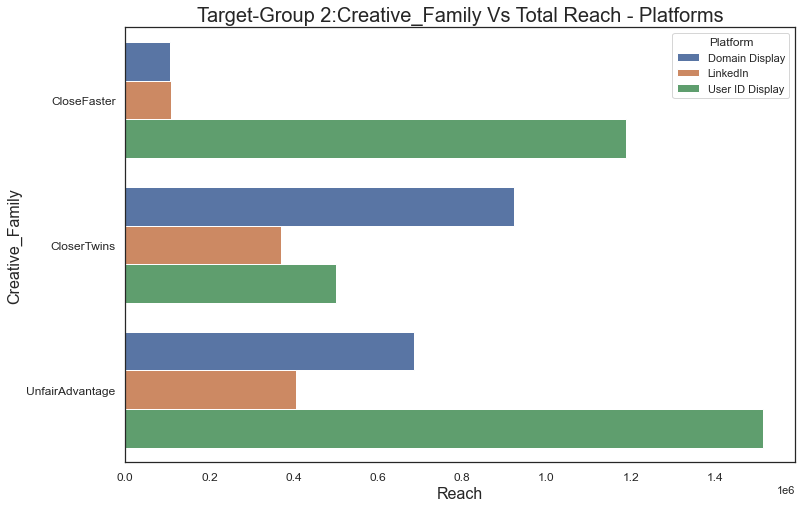

In [46]:
# Group Target_Group=2 on Platform and Creative_Family to determine total 'Reach'
fam_plat2 = tg2.loc[tg2['Creative_Family']!='Other'].groupby(['Platform','Creative_Family'])['Reach'].sum().reset_index()
sns.barplot(y='Creative_Family',x = 'Reach', hue = 'Platform', data = fam_plat2)
plt.xlabel('Reach',fontsize = 16)
plt.ylabel('Creative_Family', fontsize=16)
plt.title('Target-Group 2:Creative_Family Vs Total Reach - Platforms', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

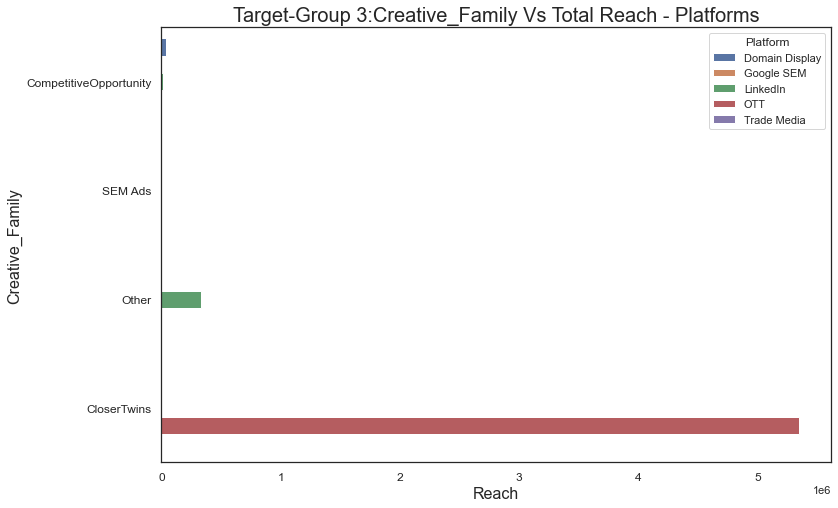

In [47]:
# Group Target_Group=3 on Platform and Creative_Family to determine total 'Reach'
fam_plat3 = tg3.groupby(['Platform','Creative_Family'])['Reach'].sum().reset_index()
sns.barplot(y='Creative_Family',x = 'Reach', hue = 'Platform', data = fam_plat3)
plt.xlabel('Reach',fontsize = 16)
plt.ylabel('Creative_Family', fontsize=16)
plt.title('Target-Group 3:Creative_Family Vs Total Reach - Platforms', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

 - CloserTwins on OTT platform has the best reach for Target Group 3

#### Create user-defined function for target groups based on  groupby  of required campaign element ['Platform'] or ['Creative_Family']

In [48]:
# User defined function : To create subsets for target groups based on column grouping and calculate CPC
def target_group(tg, column):
    tg_group = tg.groupby(column).agg({'CTR':'mean','Spend':'sum','Clicks':'sum',\
                                        'Impressions':'sum','Reach':'sum','Weighted_CTR_Score':'sum'
                                       }).reset_index()
    # Add new column 'CPC' to determine Cost per Click for platforms
    tg_group['CPC'] = tg_group['Spend']/tg_group['Clicks']
    return tg_group
    

#### Groupby 'Platform'

In [49]:
# Target group 1 platform grouping
tg1_plat = target_group(tg1, 'Platform')
tg1_plat

,Platform,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC
0,Domain Display,0.000462,23881.933135,1303,2739642,183363,1562301.0,18.328421
1,Facebook,0.006786,5023.482582,1818,262991,159565,0.0,2.763192
2,Instagram,0.004894,1023.677626,177,56001,29759,0.0,5.783489
3,LinkedIn,0.007642,39454.821303,935,516285,137836,296219.0,42.197670
4,User ID Display,0.006496,25847.311728,9286,5033150,2646138,3594606.0,2.783471


In [50]:
# Target group 2 platform grouping
tg2_plat = target_group(tg2, 'Platform')
tg2_plat

,Platform,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC
0,Domain Display,0.001320,133867.053908,18115,19564371,1715087,11694403.5,7.389846
1,LinkedIn,0.007533,160038.731038,10456,3165406,883345,2446067.0,15.305923
2,User ID Display,0.004334,29331.148822,10294,5998098,3204355,4205924.5,2.849344


In [51]:
# Target group 3 platform grouping
tg3_plat = target_group(tg3, 'Platform')
tg3_plat

,Platform,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC
0,Domain Display,0.000468,1275.127592,263,262110,42156,149696.5,4.848394
1,Google SEM,0.121078,8674.350000,12429,66693,0,0.0,0.697912
2,LinkedIn,0.001235,12390.641315,1024,1347888,347312,702625.0,12.100236
3,OTT,0.000000,249833.910000,0,7348177,5349629,0.0,inf
4,Trade Media,0.002449,10800.000008,445,566118,0,0.0,24.269663


#### Groupby 'Creative_Family' campaign

In [52]:
# Target group 1 campaign grouping
tg1_camp = target_group(tg1,'Creative_Family')
tg1_camp

,Creative_Family,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC
0,CloseFaster,0.003444,14083.132090,3282,1805930,885554,1244751.0,4.291021
1,CloserTwins,0.002694,41115.631535,3995,2708066,761241,1573166.0,10.291773
2,Other,0.021038,665.495891,25,1031,0,1129.5,26.619836
3,UnfairAdvantage,0.002435,39366.966858,6217,4093042,1509866,2634079.5,6.332148


In [53]:
# Target group 2 campaign grouping
tg2_camp = target_group(tg2,'Creative_Family')
tg2_camp

,Creative_Family,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC
0,CloseFaster,0.003312,43361.166342,7499,4269441,1403328,3128035.5,5.782260
1,CloserTwins,0.002623,101870.513593,10072,9812880,1793577,5819007.5,10.114229
2,Other,0.010372,229.080000,573,55247,0,82870.5,0.399791
3,UnfairAdvantage,0.002031,177776.173833,20721,14590307,2605882,9316481.5,8.579517


In [54]:
# Target group 3 campaign grouping
tg3_camp = target_group(tg3,'Creative_Family')
tg3_camp

,Creative_Family,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC
0,CloserTwins,0.000081,249833.910000,72,7397016,5349629,0.0,3469.915417
1,CompetitiveOpportunity,0.001939,3261.037592,373,276361,56018,166726.5,8.742728
2,Other,0.001295,21204.731323,1287,1850916,333450,685595.0,16.476093
3,SEM Ads,0.121078,8674.350000,12429,66693,0,0.0,0.697912


### Target Group 1

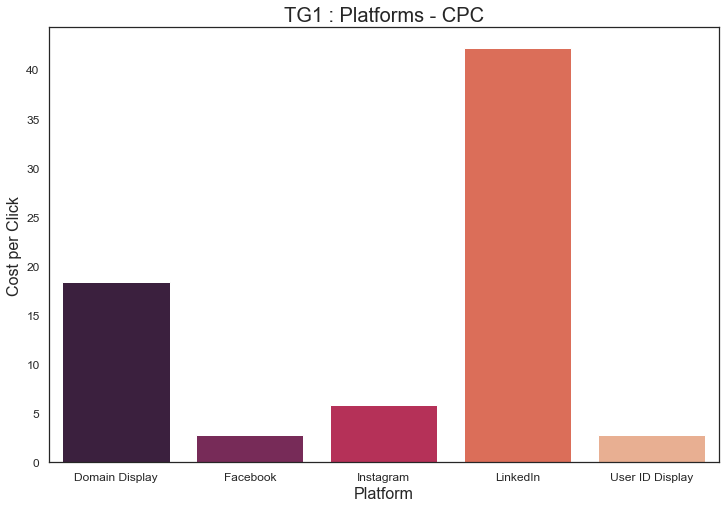

In [55]:
# TG1 : Plot Platform and Cost Per Click 
sns.barplot(x='Platform',y = 'CPC', data = tg1_plat, palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Cost per Click', fontsize=16)
plt.title('TG1 : Platforms - CPC', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

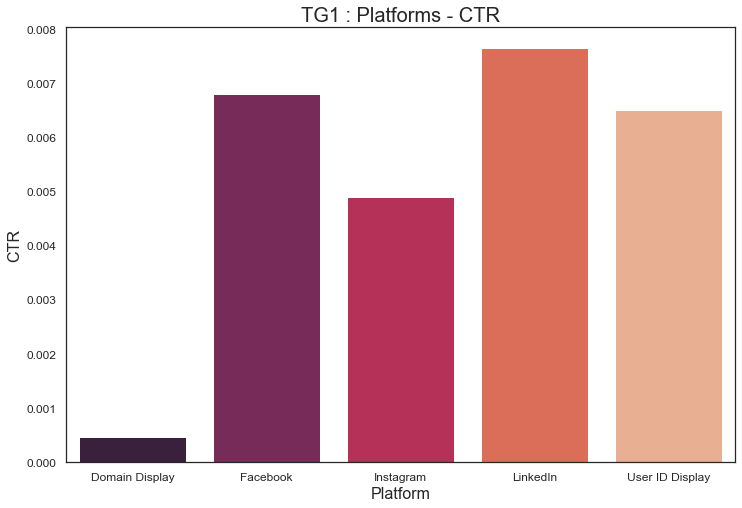

In [56]:
# TG1 : Plot Platform and CTR
sns.barplot(x='Platform',y = 'CTR', data = tg1_plat, palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CTR', fontsize=16)
plt.title('TG1 : Platforms - CTR', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

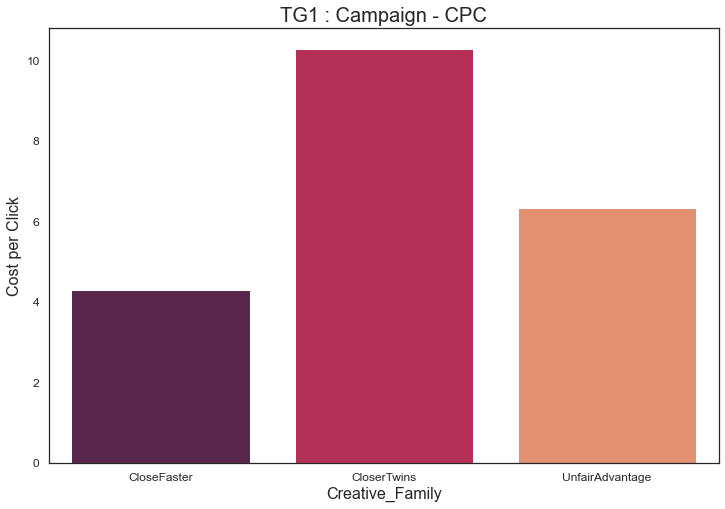

In [57]:
# TG1 : Plot Campaign and Cost Per Click
tg1_camp = tg1_camp.loc[tg1_camp['Creative_Family']!='Other']
sns.barplot(x='Creative_Family',y = 'CPC', data = tg1_camp, palette = 'rocket')
plt.xlabel('Creative_Family',fontsize = 16)
plt.ylabel('Cost per Click', fontsize=16)
plt.title('TG1 : Campaign - CPC', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

Target Group 1

CPC : 'Facebook' is the most cost effective platform
        - 'LinkedIn' is the most expensive

CTR: 'LinkedIn' has highest 
 
'CloseFaster' is the most cost effective in terms of CPC

### Target Group 2

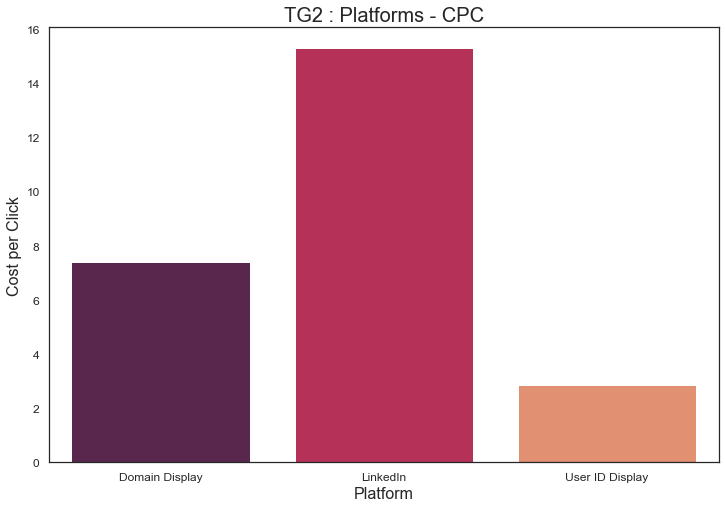

In [58]:
# TG2 : Plot Platform and Cost Per Click 
sns.barplot(x='Platform',y = 'CPC', data = tg2_plat, palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Cost per Click', fontsize=16)
plt.title('TG2 : Platforms - CPC', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

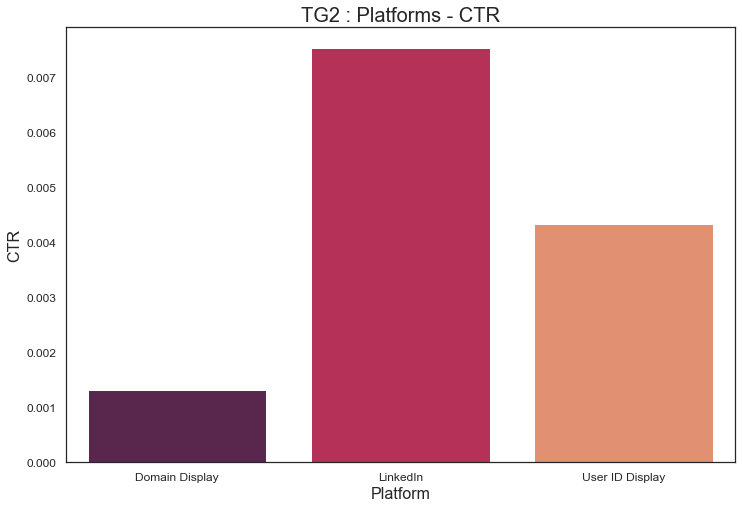

In [59]:
# TG2 : Plot Platform and CTR
sns.barplot(x='Platform',y = 'CTR', data = tg2_plat, palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CTR', fontsize=16)
plt.title('TG2 : Platforms - CTR', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

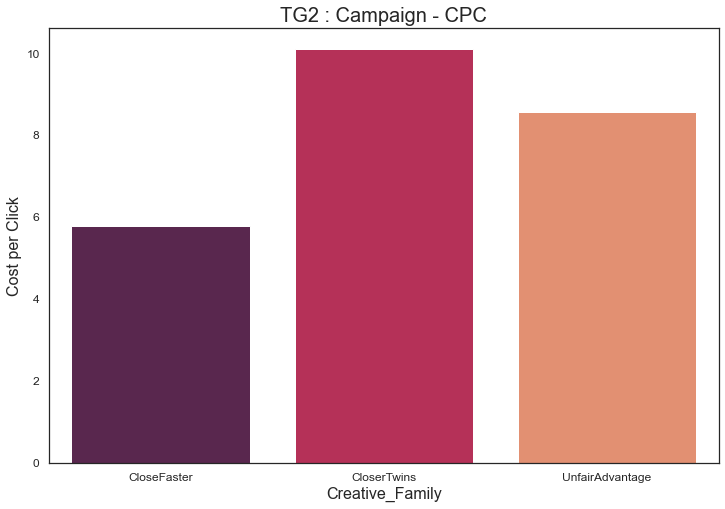

In [60]:
# TG2 : Plot Campaign and Cost Per Click
tg2_camp = tg2_camp.loc[tg2_camp['Creative_Family']!='Other']
sns.barplot(x='Creative_Family',y = 'CPC', data = tg2_camp, palette = 'rocket')
plt.xlabel('Creative_Family',fontsize = 16)
plt.ylabel('Cost per Click', fontsize=16)
plt.title('TG2 : Campaign - CPC', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

Target Group 2:

CPC: UserID Display is the best CPC, followed by Domain Display

CTR: LinkedIn has the highest

CloserFaster is the best cost effective campaign


### Target Group 3

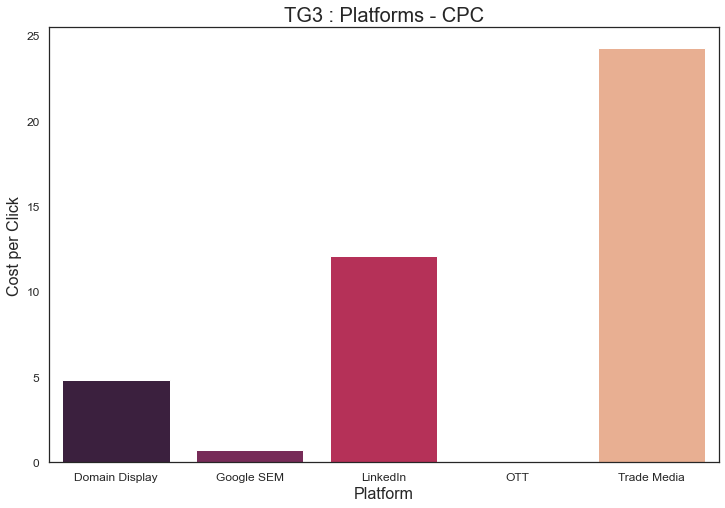

In [61]:
# TG3 : Plot Platform and Cost Per Click 
sns.barplot(x='Platform',y = 'CPC', data = tg3_plat, palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Cost per Click', fontsize=16)
plt.title('TG3 : Platforms - CPC', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

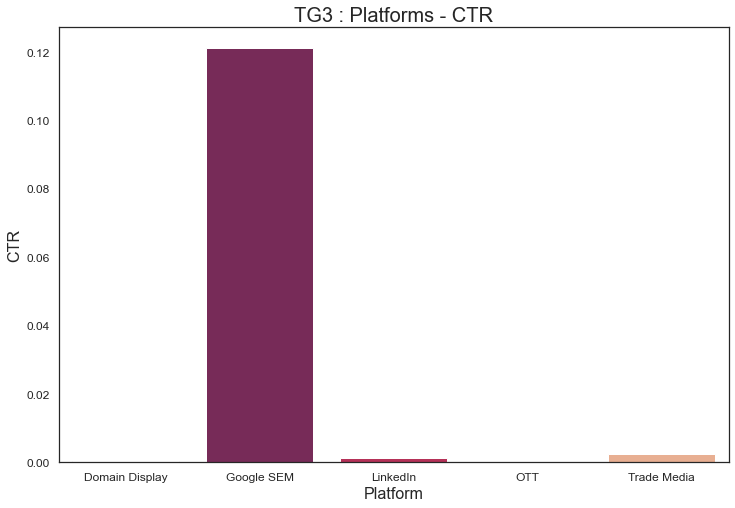

In [62]:
# TG3 : Plot Platform and CTR
sns.barplot(x='Platform',y = 'CTR', data = tg3_plat, palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CTR', fontsize=16)
plt.title('TG3 : Platforms - CTR', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

'OTT' does not have 'Clicks'.
Looking at 'Impressions' instead

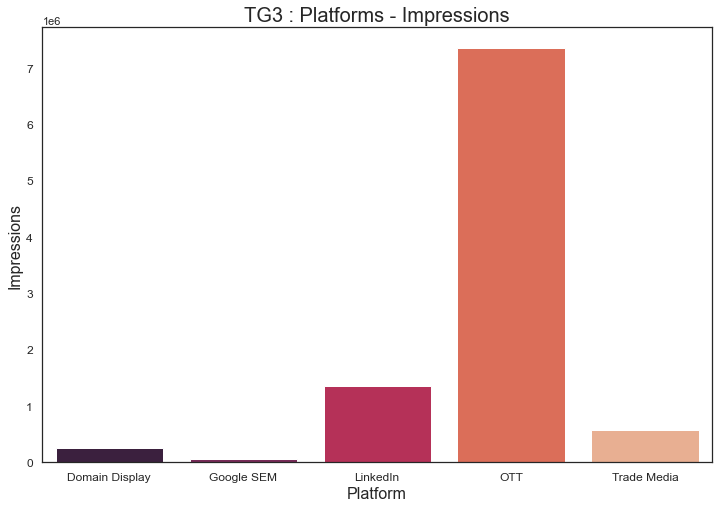

In [63]:
# TG3 : Plot Platform and Impressions
sns.barplot(x='Platform',y = 'Impressions', data = tg3_plat, palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Impressions', fontsize=16)
plt.title('TG3 : Platforms - Impressions', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

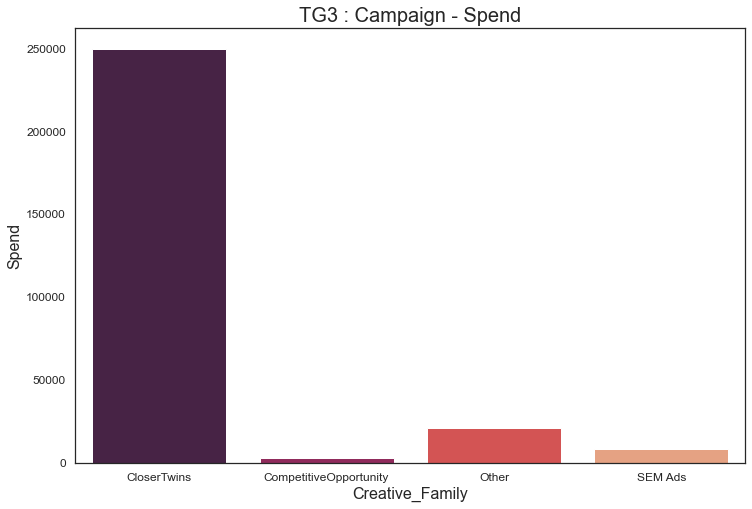

In [64]:
# TG3 : Plot Campaign and Spend
#tg3_camp = tg3_camp.loc[tg3_camp['Creative_Family']!='Other']
sns.barplot(x='Creative_Family',y = 'Spend', data = tg3_camp, palette = 'rocket')
plt.xlabel('Creative_Family',fontsize = 16)
plt.ylabel('Spend', fontsize=16)
plt.title('TG3 : Campaign - Spend', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

Target Group 3:

OTT platform does not have clicks. So looking at 'Impressions' across the platforms and campaigns

Impressions: OTT has the highest 

CloserTwins : most spend on this campaign



#### Final Weighted_CTR_Score 

In [65]:
# Final Weighted CTR across the platform  for the target groups
tg1_plat['Final_Wt_CTR'] = tg1_plat['Weighted_CTR_Score']/tg1_plat['Impressions']
tg2_plat['Final_Wt_CTR'] = tg2_plat['Weighted_CTR_Score']/tg2_plat['Impressions']
tg3_plat['Final_Wt_CTR'] = tg3_plat['Weighted_CTR_Score']/tg3_plat['Impressions']

In [66]:
# Final Weighted CTR across the platform  for the target groups
tg1_camp['Final_Wt_CTR'] = tg1_camp['Weighted_CTR_Score']/tg1_plat['Impressions']
tg2_camp['Final_Wt_CTR'] = tg2_camp['Weighted_CTR_Score']/tg2_camp['Impressions']
tg3_camp['Final_Wt_CTR'] = tg3_camp['Weighted_CTR_Score']/tg3_camp['Impressions']

In [67]:
tg2_camp

,Creative_Family,CTR,Spend,Clicks,Impressions,Reach,Weighted_CTR_Score,CPC,Final_Wt_CTR
0,CloseFaster,0.003312,43361.166342,7499,4269441,1403328,3128035.5,5.782260,0.732657
1,CloserTwins,0.002623,101870.513593,10072,9812880,1793577,5819007.5,10.114229,0.592997
3,UnfairAdvantage,0.002031,177776.173833,20721,14590307,2605882,9316481.5,8.579517,0.638539


### Target Group 2 : Increase Engagement

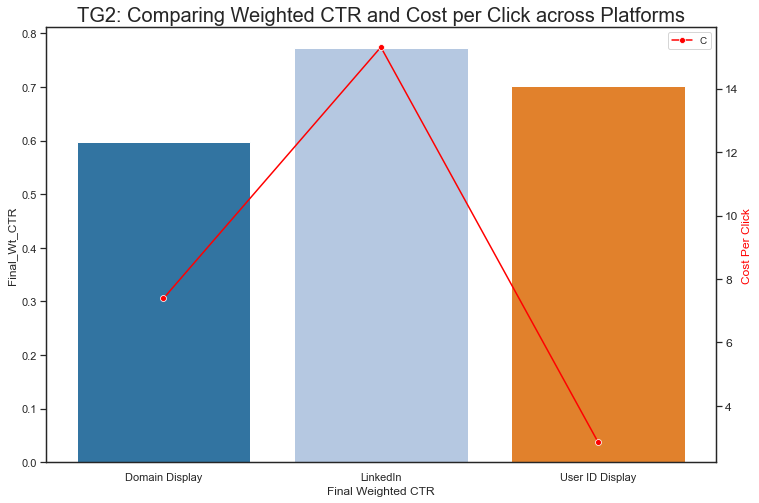

In [68]:
# TG2 : Plot for Final Wt_CTR and CPC across platforms

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.barplot(x = 'Platform',y = 'Final_Wt_CTR', palette = 'tab20',data = tg2_plat, ax=ax1)

sns.lineplot(data=tg2_plat, x = 'Platform', y='CPC', ax = ax2 ,color='red', marker='o')

ax1.set_xlabel('Final Weighted CTR', fontsize=12)
ax2.set_ylabel('Cost Per Click', color='red', fontsize=12)

plt.title("TG2: Comparing Weighted CTR and Cost per Click across Platforms", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend("Cost Per Click", fontsize=10)

User ID Display has a good weighted CTR and is cost effective too


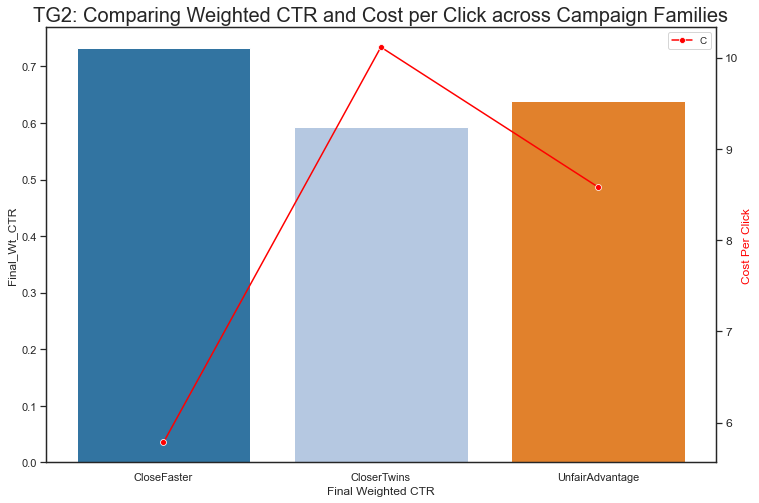

In [69]:
# Target Group 2
# Plot for Final Wt_CTR and CPC across campaigns
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.barplot(x = 'Creative_Family',y = 'Final_Wt_CTR', palette = 'tab20',data = tg2_camp, ax=ax1)

sns.lineplot(data=tg2_camp, x = 'Creative_Family', y='CPC', ax = ax2 ,color='red', marker='o')

ax1.set_xlabel('Final Weighted CTR', fontsize=12)
ax2.set_ylabel('Cost Per Click', color='red', fontsize=12)

plt.title("TG2: Comparing Weighted CTR and Cost per Click across Campaign Families", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend("Cost Per Click", fontsize=10)

CloseFaster is the best cost effective campaign and also has the highest weighted CTR score in Target Group 2